In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage


Bad key "text.kerning_factor" on line 4 in
/home/mr/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def plot_side_by_side(img1, img2, title1, title2, cmap = None):
    fig = plt.figure(tight_layout='auto', figsize=(10, 7))
    fig.add_subplot(221)
    plt.title(title1)
    plt.imshow(img)

    fig.add_subplot(222)
    plt.title(title2)
    plt.imshow(img2, cmap = None)
    return fig

In [3]:
# load Image
# dividing by 255 to scale intensity values between 0,1
img = imread('./butterfly.jpg') / 255

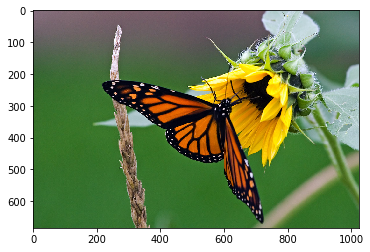

In [4]:
# plot original Image
plt.imshow(img)
plt.show()

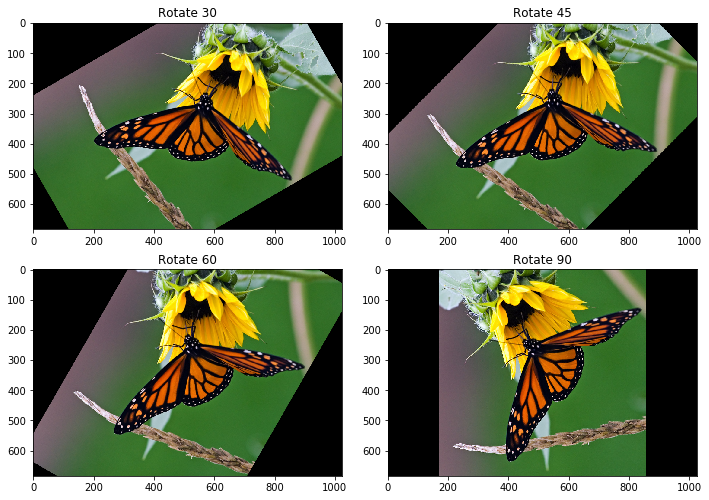

In [5]:
# image rotation using skimage.transformation.rotate
rotate30 = rotate(img, angle=30)
rotate45 = rotate(img, angle=45)
rotate60 = rotate(img, angle=60)
rotate90 = rotate(img, angle=90)

fig = plt.figure(tight_layout='auto', figsize=(10, 7))

fig.add_subplot(221)
plt.title('Rotate 30')
plt.imshow(rotate30)

fig.add_subplot(222)
plt.title('Rotate 45')
plt.imshow(rotate45)

fig.add_subplot(223)
plt.title('Rotate 60')
plt.imshow(rotate60)

fig.add_subplot(224)
plt.title('Rotate 90')
plt.imshow(rotate90)

plt.show()

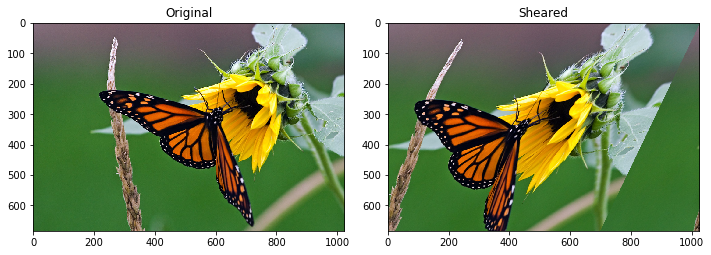

In [6]:
# image shearing using sklearn.transform.AffineTransform
# try out with differnt values of shear 
tf = AffineTransform(shear=-0.5)
sheared = transform.warp(img, tf, order=1, preserve_range=True, mode='wrap')

sheared_fig = plot_side_by_side(img, sheared, 'Original', 'Sheared')

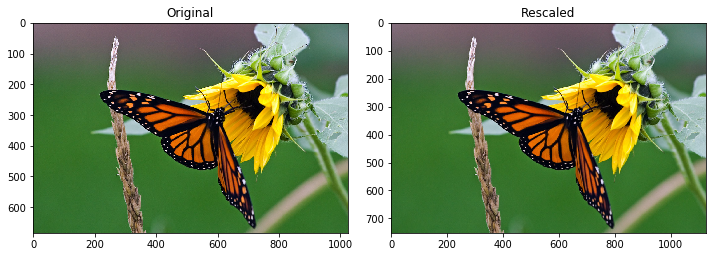

In [7]:
# Image rescaling with sklearn.transform.rescale
rescaled = transform.rescale(img, 1.1)

rescaled_fig = plot_side_by_side(img, rescaled, 'Original', 'Rescaled')
plt.show()

In [8]:
print('Original Shape: ',img.shape)
print('Rescaled Shape: ',rescaled.shape)

Original Shape:  (684, 1024, 3)
Rescaled Shape:  (752, 1126, 3)


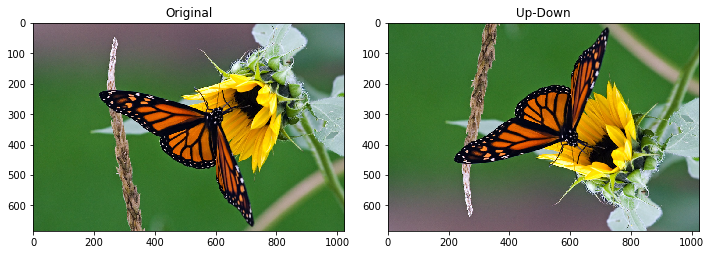

In [9]:
# flip up-down using np.flipud
up_down = np.flipud(img)

fig_updown = plot_side_by_side(img, up_down, 'Original', 'Up-Down')
plt.show()

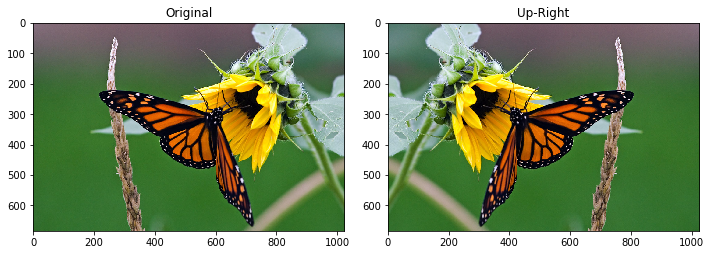

In [10]:
# flip up-down using np.flipud
left_right = np.fliplr(img)

fig_lr = plot_side_by_side(img, left_right, 'Original', 'Up-Right')
plt.show()

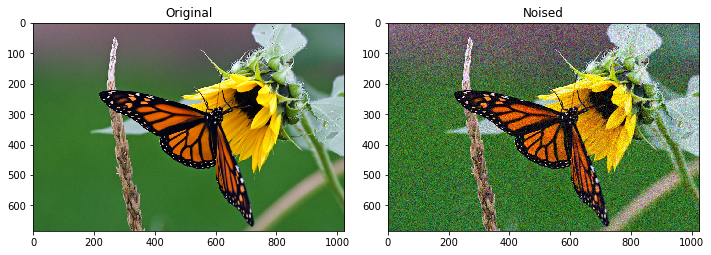

In [11]:
# Apply Random Noise to image using skimage.utils.random_noise
noised = random_noise(img, var=0.1**2)

fig_noised = plot_side_by_side(img, noised, 'Original', 'Noised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


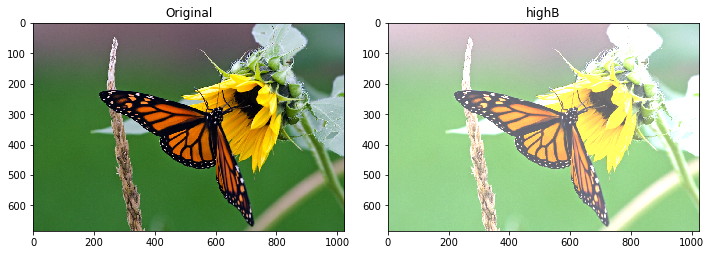

In [12]:
# Increasing the brighness of the Image
# Note: Here we add 100/255 since we scaled Intensity values of Image when loading (by dividing it 255)
highB = img + (100/255)

fig_highB = plot_side_by_side(img, highB, 'Original', 'highB')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


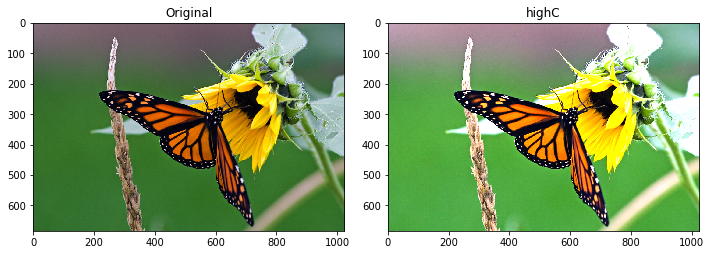

In [13]:
# Increasing the contrast of the Image
# Note: Here we add 100/255 since we scaled Intensity values of Image when loading (by dividing it 255)
highC = img * 1.5

fig_highB = plot_side_by_side(img, highC, 'Original', 'highC')
plt.show()